# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import random
import os

In [5]:
age = []
fbs = []
bp = []
chol = []
chest_pain = [] 
height = []
weight =[]

In [6]:
for i in range(20000):
    chpain_t = np.random.randint(0,2)
    chol_t = np.random.randint(150,351)
    fbs_t = np.random.randint(50,201)
    height_t = np.random.randint(140,191)
    weight_t = np.random.randint(35,111)
    bp_t = np.random.randint(75,261)
    if i%5==0 or i%3==0:
        age_t = np.random.choice([np.random.randint(20,46),np.random.randint(71,86)])
    else:
        age_t = np.random.randint(45,71)
    age.append(age_t)
    height.append(height_t)
    weight.append(weight_t)
    chest_pain.append(chpain_t)
    bp.append(bp_t)
    fbs.append(fbs_t)
    chol.append(chol_t)

In [7]:
heart_dict = {'age':age, 'height':height, 'weight':weight, 'chest_pain':chest_pain, 'bp':bp, 'fbs':fbs, 'chol':chol}

In [8]:
df_heart = pd.DataFrame(heart_dict)

In [9]:
df_heart

,age,height,weight,chest_pain,bp,fbs,chol
0,76,159,52,0,213,170,305
1,56,176,46,1,244,98,340
2,45,161,101,0,215,176,165
3,34,152,61,1,79,147,170
4,49,180,108,0,184,168,229
...,...,...,...,...,...,...,...
19995,76,190,37,0,229,104,179
19996,48,153,63,0,94,188,259
19997,62,158,38,0,255,86,266
19998,71,165,65,0,169,194,157


In [10]:
df_heart.to_csv('heart_data.csv',index=False)

# Data Filtering

In [76]:
df = pd.read_csv('heart_data.csv')

In [77]:
df1 = pd.read_csv('heart_data.csv')

In [80]:
df

,age,height,weight,chest_pain,bp,fbs,chol
0,76,159,52,0,213,170,305
1,56,176,46,1,244,98,340
2,45,161,101,0,215,176,165
3,34,152,61,1,79,147,170
4,49,180,108,0,184,168,229
...,...,...,...,...,...,...,...
19995,76,190,37,0,229,104,179
19996,48,153,63,0,94,188,259
19997,62,158,38,0,255,86,266
19998,71,165,65,0,169,194,157


In [28]:
# bmi = []

In [29]:
# for i in range(len(df)):
#     w=df1.iloc[i,2]
#     h=df1.iloc[i,1]/100
#     bmi_temp = round((w/(h**2)),2)
#     bmi.append(bmi_temp)

In [31]:
# df1.insert(7,'bmi',bmi)

In [81]:
# print(df1)

In [69]:
risk = []
rule = []

In [70]:
for i in range(len(df)):
    bmi = round(((df.iloc[i,2])/((df.iloc[i,1]/100)**2)),2)
    temp = df.iloc[i,:].tolist()
    if((temp[5]>120 and temp[4]>145 and temp[0]>52) or (bmi>=24.5 and temp[6]>210) or (temp[3]==1 and temp[6]>200 and temp[0]>56)):
        risk.append(1)
#         rule.append(1)
    elif((temp[4]>150 and temp[6]>210) or (temp[3]==1 and temp[4]<150 and temp[6]>200) or (temp[5]>=120 and temp[0]>60 and temp[6]<200)):
        risk.append(1)
#         rule.append(2)
    elif((temp[3]==0 and (bmi in range(18,25)) and temp[6]<190 and temp[0]<30) or (temp[5]<120 and temp[6]<190 and temp[0]<40)):
        risk.append(0)
#         rule.append(3)
    else:
        risk.append(0)
#         rule.append(0)
         
    

In [82]:
df1.insert(7,'risk',risk)

In [83]:
df1

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,76,159,52,0,213,170,305,1
1,56,176,46,1,244,98,340,1
2,45,161,101,0,215,176,165,0
3,34,152,61,1,79,147,170,0
4,49,180,108,0,184,168,229,1
...,...,...,...,...,...,...,...,...
19995,76,190,37,0,229,104,179,0
19996,48,153,63,0,94,188,259,1
19997,62,158,38,0,255,86,266,1
19998,71,165,65,0,169,194,157,1


In [145]:
df_yes = df1[df1.risk == 1]
df_no = df1[df1.risk == 0]

In [146]:
df_new = df1.iloc[-1:-1,:]

In [147]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk


In [148]:
df_new = df_new.append(df_no,ignore_index=True)
df_new = df_new.iloc[:3824,:]
df_new = df_new.append(df_yes,ignore_index=True)

In [149]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,45,161,101,0,215,176,165,0
1,34,152,61,1,79,147,170,0
2,30,153,102,0,210,160,154,0
3,26,162,67,1,220,84,201,0
4,56,154,92,1,142,155,185,0
...,...,...,...,...,...,...,...,...
18337,21,184,58,0,218,138,256,1
18338,48,175,72,1,137,115,230,1
18339,48,153,63,0,94,188,259,1
18340,62,158,38,0,255,86,266,1


In [150]:
df_new = df_new.iloc[:10000,:]

In [151]:
from sklearn.utils import shuffle

df_new = shuffle(df_new).reset_index(drop=True)

In [152]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,67,141,35,1,185,84,333,1
1,73,164,46,1,231,123,208,1
2,59,158,86,1,93,61,194,0
3,59,154,54,1,98,187,265,1
4,36,186,103,0,186,131,325,1
...,...,...,...,...,...,...,...,...
9995,77,174,66,0,193,188,207,1
9996,47,182,86,1,220,134,245,1
9997,77,152,72,1,245,50,204,1
9998,75,170,107,0,239,137,160,1


In [153]:
df_new.risk.value_counts()

1    6176
0    3824
Name: risk, dtype: int64

In [154]:
df_new.to_csv('heart_pred_data.csv',index=False)

In [155]:
df_new.iloc[:,:-1].to_csv('heart_filter.csv',index=False)

# Data Modelling

In [145]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

In [146]:
df = pd.read_csv('heart_pred_data.csv')
df.head(5)

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,67,141,35,1,185,84,333,1
1,73,164,46,1,231,123,208,1
2,59,158,86,1,93,61,194,0
3,59,154,54,1,98,187,265,1
4,36,186,103,0,186,131,325,1


In [147]:
df.risk.value_counts()

1    6176
0    3824
Name: risk, dtype: int64

In [148]:
db_no =df[df.risk == 0]
db_yes = df[df.risk == 1]
df_minority_upsampled = resample(db_yes,replace=True)
new_df = pd.concat([db_no, df_minority_upsampled])
#df_minority_upsampled.value_counts()
# new_df = shuffle(new_df)
X_features = list( new_df.columns )[:-1]

print("Features: ",X_features)

Features:  ['age', 'height', 'weight', 'chest_pain', 'bp', 'fbs', 'chol']


In [149]:
encoded_df = pd.get_dummies( new_df[X_features], drop_first = True )
X = encoded_df
X1 = preprocessing.normalize(X)
print(X1)
print(X.shape)

[[0.20136636 0.53925229 0.29351707 ... 0.31740799 0.20819234 0.6621199 ]
 [0.10986922 0.45729352 0.24943283 ... 0.59982656 0.37711868 0.4632324 ]
 [0.11902538 0.38931218 0.22069289 ... 0.56537055 0.46370304 0.50089847]
 ...
 [0.14233798 0.43972268 0.15758847 ... 0.57189365 0.26180021 0.6049364 ]
 [0.12593643 0.38593421 0.14827998 ... 0.41234023 0.38999667 0.70077527]
 [0.25067606 0.4785634  0.13998793 ... 0.25718713 0.59250706 0.52088533]]
(10000, 7)


In [150]:
Y = new_df.risk.map( lambda x: int( x == 1) )
print(Y.shape)
a = pd.DataFrame(Y)
b = a.as_matrix().reshape(-1,1)
a = pd.DataFrame(b)
Y1= preprocessing.normalize(a)
print(Y1)

(10000,)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [151]:
train_X, test_X, train_y, test_y = train_test_split(X1,Y1,test_size = 0.3,random_state = 65)

# Log Reg

In [152]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit( train_X, train_y)
pred_y = logit.predict(test_X)

In [153]:
r2=r2_score(test_y, pred_y) 
mse=mean_squared_error(test_y, pred_y)
print("R Squared Error : ",r2)
print("Mean Squared Error : ",mse)

R Squared Error :  0.03562129709641537
Mean Squared Error :  0.22766666666666666


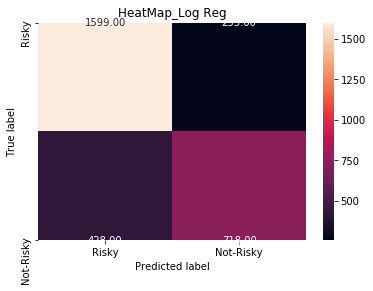

In [154]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_Log Reg')
    plt.show()
draw_cm(test_y,pred_y )

In [155]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

         0.0       0.74      0.63      0.68      1146
         1.0       0.79      0.86      0.82      1854

    accuracy                           0.77      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.77      0.77      0.77      3000



In [156]:
acc = metrics.accuracy_score(test_y, pred_y)
print("Accuracy:",acc)

Accuracy: 0.7723333333333333


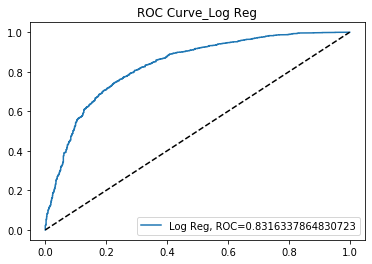

In [157]:
y_pred_proba = logit.predict_proba(test_X)[:,1]
fpr, tpr, _ = metrics.roc_curve( test_y,  y_pred_proba)
auc = metrics.roc_auc_score( test_y, y_pred_proba)
plt.plot(fpr,tpr,label="Log Reg, ROC="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve_Log Reg')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

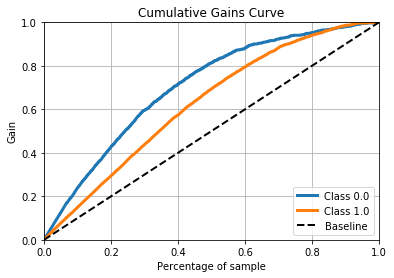

In [158]:
predicted_probas = logit.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas)
plt.show()

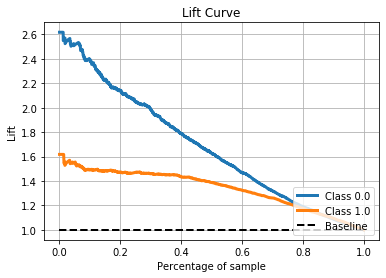

In [159]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas)
plt.show()

# MLP

In [160]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit( train_X, train_y)
pred_y1 = mlp.predict(test_X)

In [161]:
r21=r2_score(test_y, pred_y1) 
mse1=mean_squared_error(test_y, pred_y1)
print("R Squared Error : ",r21)
print("Mean Squared Error : ",mse1)

R Squared Error :  0.27565699181619485
Mean Squared Error :  0.171


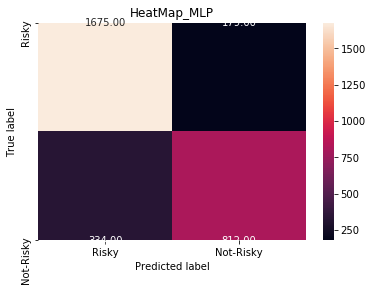

In [162]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_MLP')
    plt.show()
draw_cm(test_y,pred_y1 )

In [163]:
print( metrics.classification_report( test_y, pred_y1 ) )

              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76      1146
         1.0       0.83      0.90      0.87      1854

    accuracy                           0.83      3000
   macro avg       0.83      0.81      0.81      3000
weighted avg       0.83      0.83      0.83      3000



In [164]:
acc1 = metrics.accuracy_score(test_y, pred_y1)
print("Accuracy:",acc1)

Accuracy: 0.829


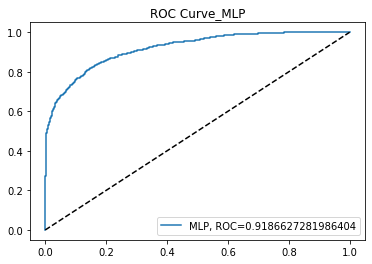

In [165]:
y_pred_proba1 = mlp.predict_proba(test_X)[:,1]
fpr1, tpr1, _ = metrics.roc_curve( test_y,  y_pred_proba1)
auc1 = metrics.roc_auc_score( test_y, y_pred_proba1)
plt.plot(fpr1,tpr1,label="MLP, ROC="+str(auc1))
plt.legend(loc=4)
plt.title('ROC Curve_MLP')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

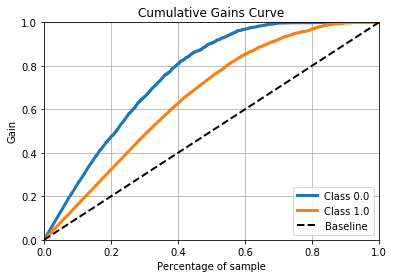

In [166]:
predicted_probas1 = mlp.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas1)
plt.show()

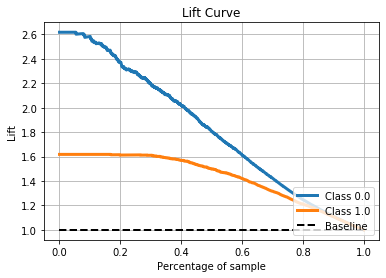

In [167]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas1)
plt.show()

# SVM

In [210]:
from sklearn.svm import SVC

svcl = SVC(kernel='rbf',probability=True)
svcl.fit( train_X, train_y)
pred_y2 = svcl.predict(test_X)

In [211]:
r22=r2_score(test_y, pred_y2) 
mse2=mean_squared_error(test_y, pred_y2)
print("R Squared Error : ",r22)
print("Mean Squared Error : ",mse2)

R Squared Error :  0.06386079059285998
Mean Squared Error :  0.221


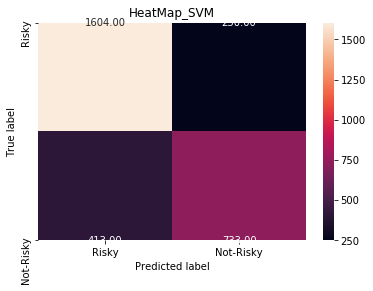

In [212]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_SVM')
    plt.show()
draw_cm(test_y,pred_y2 )

In [213]:
print( metrics.classification_report( test_y, pred_y2 ) )

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69      1146
         1.0       0.80      0.87      0.83      1854

    accuracy                           0.78      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.78      0.78      0.78      3000



In [214]:
acc2 = metrics.accuracy_score(test_y, pred_y2)
print("Accuracy:",acc2)

Accuracy: 0.779


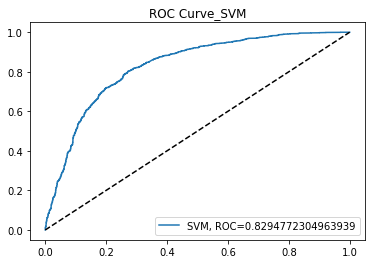

In [215]:
y_pred_proba2 = svcl.predict_proba(test_X)[:,1]
fpr2, tpr2, _ = metrics.roc_curve( test_y,  y_pred_proba2)
auc2 = metrics.roc_auc_score( test_y, y_pred_proba2)
plt.plot(fpr2,tpr2,label="SVM, ROC="+str(auc2))
plt.legend(loc=4)
plt.title('ROC Curve_SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

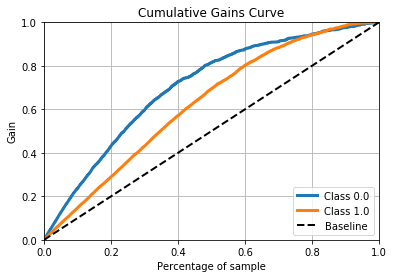

In [216]:
predicted_probas2 = svcl.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas2)
plt.show()

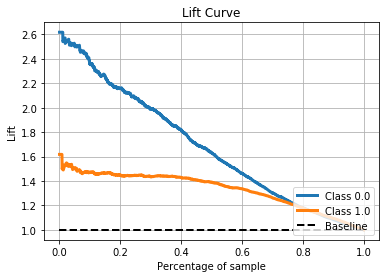

In [217]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas2)
plt.show()

# KNN

In [176]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit( train_X, train_y)
pred_y3 = knn.predict(test_X)

In [177]:
r23=r2_score(test_y, pred_y3) 
mse3=mean_squared_error(test_y, pred_y3)
print("R Squared Error : ",r23)
print("Mean Squared Error : ",mse3)

R Squared Error :  0.3688473203544622
Mean Squared Error :  0.149


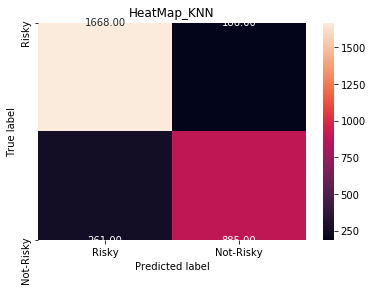

In [178]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_KNN')
    plt.show()
draw_cm(test_y,pred_y3 )

In [179]:
print( metrics.classification_report( test_y, pred_y3 ) )

              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80      1146
         1.0       0.86      0.90      0.88      1854

    accuracy                           0.85      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.85      0.85      0.85      3000



In [180]:
acc3 = metrics.accuracy_score(test_y, pred_y3)
print("Accuracy:",acc3)

Accuracy: 0.851


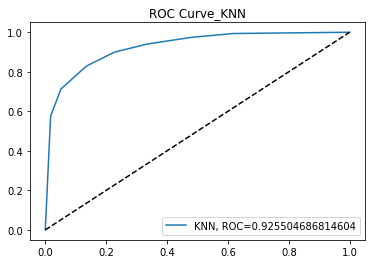

In [181]:
y_pred_proba3 = knn.predict_proba(test_X)[:,1]
fpr3, tpr3, _ = metrics.roc_curve( test_y,  y_pred_proba3)
auc3 = metrics.roc_auc_score( test_y, y_pred_proba3)
plt.plot(fpr3,tpr3,label="KNN, ROC="+str(auc3))
plt.legend(loc=4)
plt.title('ROC Curve_KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

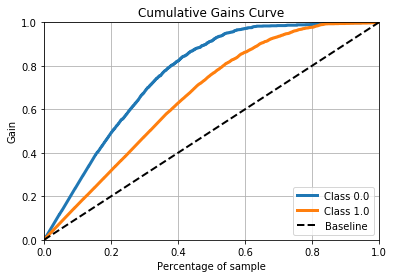

In [182]:
predicted_probas3 = knn.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas3)
plt.show()

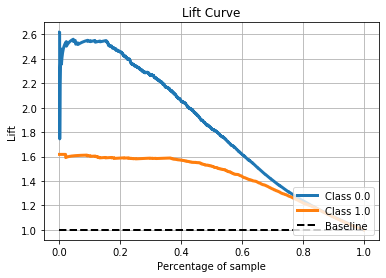

In [183]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas3)
plt.show()

# Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit( train_X, train_y)
pred_y4 = rf.predict(test_X)

In [185]:
r24=r2_score(test_y, pred_y4) 
mse4=mean_squared_error(test_y, pred_y4)
print("R Squared Error : ",r24)
print("Mean Squared Error : ",mse4)

R Squared Error :  0.7910277481263096
Mean Squared Error :  0.04933333333333333


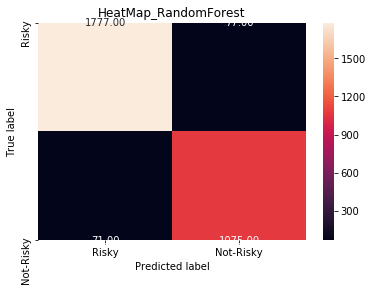

In [186]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_RandomForest')
    plt.show()
draw_cm(test_y,pred_y4 )

In [187]:
print( metrics.classification_report( test_y, pred_y4 ) )

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1146
         1.0       0.96      0.96      0.96      1854

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [188]:
acc4 = metrics.accuracy_score(test_y, pred_y4)
print("Accuracy:",acc4)

Accuracy: 0.9506666666666667


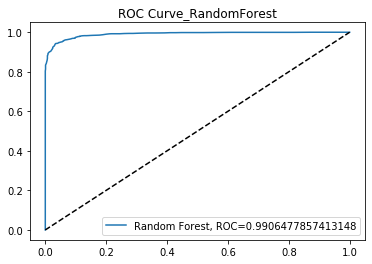

In [189]:
y_pred_proba4 = rf.predict_proba(test_X)[:,1]
fpr4, tpr4, _ = metrics.roc_curve( test_y,  y_pred_proba4)
auc4 = metrics.roc_auc_score( test_y, y_pred_proba4)
plt.plot(fpr4,tpr4,label="Random Forest, ROC="+str(auc4))
plt.legend(loc=4)
plt.title('ROC Curve_RandomForest')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

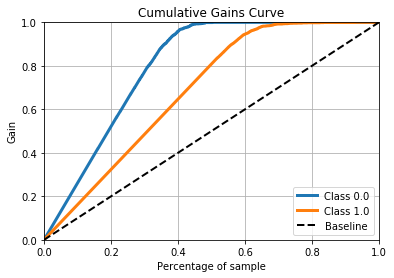

In [190]:
predicted_probas4 = rf.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas4)
plt.show()

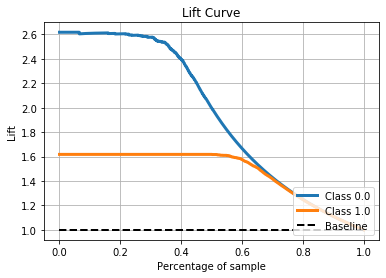

In [191]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas4)
plt.show()

# Ensemble Classifier

In [197]:
from sklearn.ensemble import AdaBoostClassifier

ens = AdaBoostClassifier(n_estimators=100)
ens.fit( train_X, train_y)
pred_y5 = ens.predict(test_X)

In [198]:
r25=r2_score(test_y, pred_y5) 
mse5=mean_squared_error(test_y, pred_y5)
print("R Squared Error : ",r25)
print("Mean Squared Error : ",mse5)

R Squared Error :  0.2107061567743722
Mean Squared Error :  0.18633333333333332


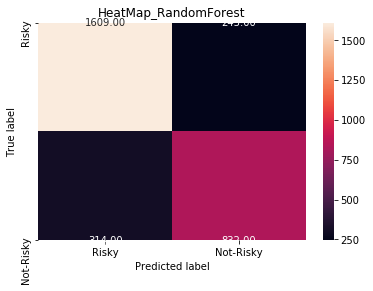

In [199]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_RandomForest')
    plt.show()
draw_cm(test_y,pred_y5 )

In [201]:
print( metrics.classification_report( test_y, pred_y5 ) )

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75      1146
         1.0       0.84      0.87      0.85      1854

    accuracy                           0.81      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.81      0.81      0.81      3000



In [202]:
acc5 = metrics.accuracy_score(test_y, pred_y5)
print("Accuracy:",acc5)

Accuracy: 0.8136666666666666


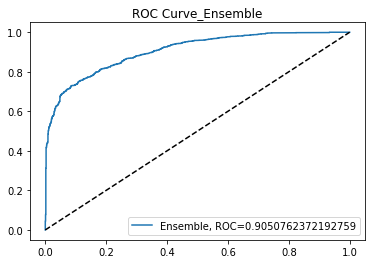

In [204]:
y_pred_proba5 = ens.predict_proba(test_X)[:,1]
fpr5, tpr5, _ = metrics.roc_curve( test_y,  y_pred_proba5)
auc5 = metrics.roc_auc_score( test_y, y_pred_proba5)
plt.plot(fpr5,tpr5,label="Ensemble, ROC="+str(auc5))
plt.legend(loc=4)
plt.title('ROC Curve_Ensemble')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

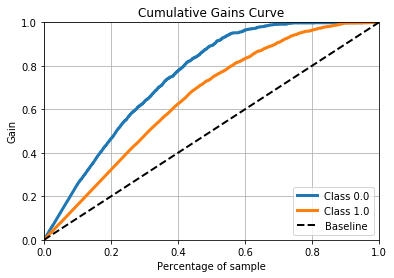

In [205]:
predicted_probas5 = ens.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas5)
plt.show()

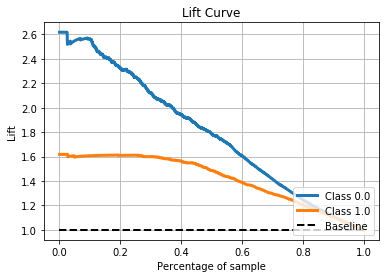

In [206]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas5)
plt.show()

# Gradient Boosting Classifier

In [225]:
from sklearn.ensemble import GradientBoostingClassifier

ensgr = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
ensgr.fit( train_X, train_y)
pred_y6 = ensgr.predict(test_X)

In [226]:
r26=r2_score(test_y, pred_y6) 
mse6=mean_squared_error(test_y, pred_y6)
print("R Squared Error : ",r26)
print("Mean Squared Error : ",mse6)

R Squared Error :  0.22058997949812775
Mean Squared Error :  0.184


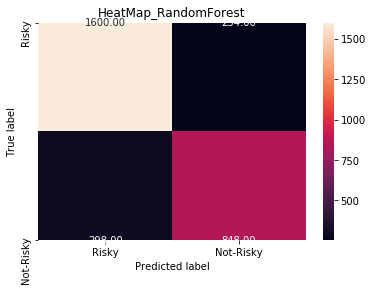

In [227]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_RandomForest')
    plt.show()
draw_cm(test_y,pred_y6 )

In [228]:
print( metrics.classification_report( test_y, pred_y6 ) )

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75      1146
         1.0       0.84      0.86      0.85      1854

    accuracy                           0.82      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.81      0.82      0.82      3000



In [230]:
acc6 = metrics.accuracy_score(test_y, pred_y6)
print("Accuracy:",acc6)

Accuracy: 0.816


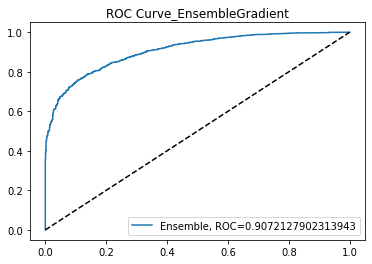

In [231]:
y_pred_proba6 = ensgr.predict_proba(test_X)[:,1]
fpr6, tpr6, _ = metrics.roc_curve( test_y,  y_pred_proba6)
auc6 = metrics.roc_auc_score( test_y, y_pred_proba6)
plt.plot(fpr6,tpr6,label="Ensemble, ROC="+str(auc6))
plt.legend(loc=4)
plt.title('ROC Curve_EnsembleGradient')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

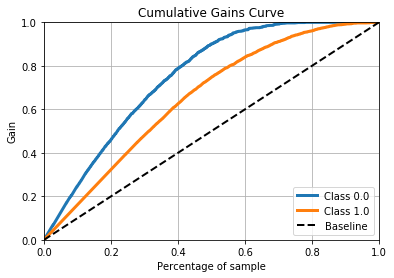

In [232]:
predicted_probas6 = ensgr.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas6)
plt.show()

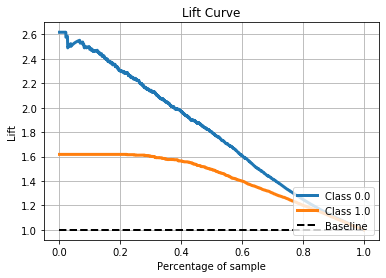

In [233]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas6)
plt.show()

# ROC Curve Comparison

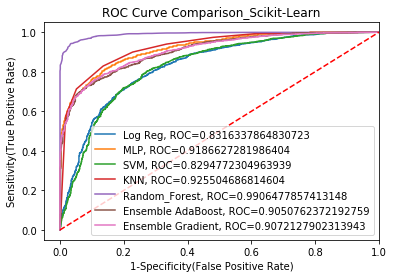

In [234]:
plt.plot(fpr,tpr,label="Log Reg, ROC="+str(auc))
plt.plot(fpr1,tpr1,label="MLP, ROC="+str(auc1))
plt.plot(fpr2,tpr2,label="SVM, ROC="+str(auc2)) 
plt.plot(fpr3,tpr3,label="KNN, ROC="+str(auc3))
plt.plot(fpr4,tpr4,label="Random_Forest, ROC="+str(auc4))
plt.plot(fpr5,tpr5,label="Ensemble AdaBoost, ROC="+str(auc5))
plt.plot(fpr6,tpr6,label="Ensemble Gradient, ROC="+str(auc6))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC Curve Comparison_Scikit-Learn')
plt.legend(loc="lower right")
plt.show() 

# Accuracy Score Comparison

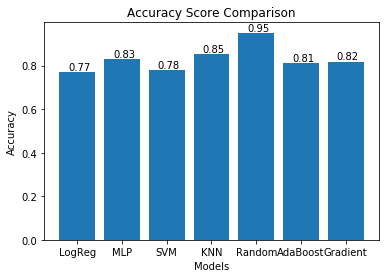

In [238]:
xval = np.arange(7)
yval = [acc,acc1,acc2,acc3,acc4,acc5,acc6]
yval1 = [round(x,2) for x in yval]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval,yval)
plt.xticks(xval,xname)
plt.xlabel('Models')
plt.ylabel('Accuracy')
for i, top_label in enumerate(yval1):
    plt.text(xval[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('Accuracy Score Comparison')
plt.show()

In [43]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os

In [44]:
df = pd.read_csv('heart_pred_data.csv')

In [45]:
df

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,67,141,35,1,185,84,333,1
1,73,164,46,1,231,123,208,1
2,59,158,86,1,93,61,194,0
3,59,154,54,1,98,187,265,1
4,36,186,103,0,186,131,325,1
...,...,...,...,...,...,...,...,...
9995,77,174,66,0,193,188,207,1
9996,47,182,86,1,220,134,245,1
9997,77,152,72,1,245,50,204,1
9998,75,170,107,0,239,137,160,1


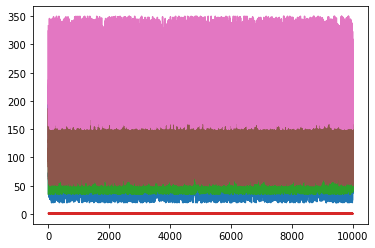

In [77]:
 plt.plot(df.iloc[:,:-1])

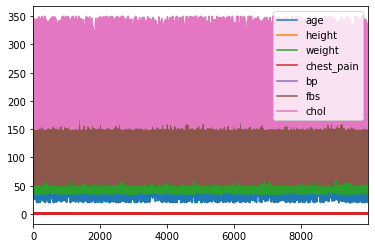

In [76]:
df.iloc[:,:-1].plot()

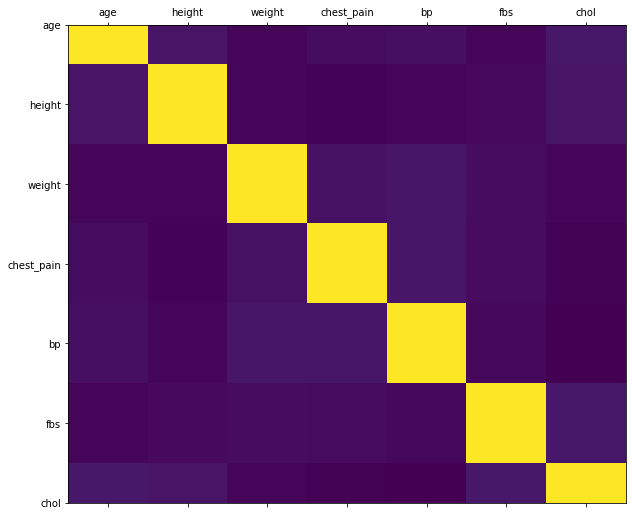

In [88]:
size=10
corr = df.iloc[:,:-1].corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [89]:
col = df.columns.tolist()[:-1]
print(col)

['age', 'height', 'weight', 'chest_pain', 'bp', 'fbs', 'chol']


In [90]:
cat_col = []
for n in col:
#     df.i.value_counts().plot.bar().grid()
#     print(df[n])
    df_col = list(set(df[n].tolist()))
#     print(df_col)
    if len(df_col) < 10:
        cat_col.append(n)
        

In [91]:
print(cat_col)

['chest_pain']


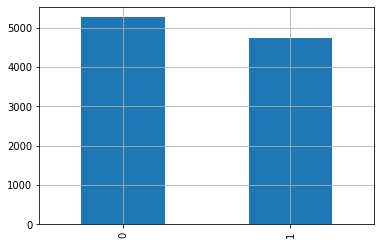

In [92]:
df['chest_pain'].value_counts().plot.bar().grid()

In [93]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

In [94]:
df = pd.read_csv('diabetics_new_data.csv')
df.head(5)

,bmi,pre_meal_glucose,post_meal_glucose,diastolic_pressure,systolic_pressure,family_history,risk
0,20,89,117,63,94,1,1
1,22,64,119,73,104,0,0
2,20,64,111,79,114,0,0
3,20,105,146,61,110,0,1
4,18,64,113,76,101,0,0


In [95]:
df.risk.value_counts()

1    6000
0    4000
Name: risk, dtype: int64

In [96]:
db_no =df[df.risk == 0]
db_yes = df[df.risk == 1]
df_minority_upsampled = resample(db_yes,replace=True)
new_df = pd.concat([db_no, df_minority_upsampled])
#df_minority_upsampled.value_counts()
# new_df = shuffle(new_df)
X_features = list( new_df.columns )[:-1]

print("Features: ",X_features)

Features:  ['bmi', 'pre_meal_glucose', 'post_meal_glucose', 'diastolic_pressure', 'systolic_pressure', 'family_history']


In [97]:
encoded_df = pd.get_dummies( new_df[X_features], drop_first = True )
X = encoded_df
X1 = preprocessing.normalize(X)
print(X1)
print(X.shape)

[[0.11778693 0.34265288 0.6371202  0.39083844 0.55681093 0.        ]
 [0.10533029 0.33705692 0.58458309 0.41605463 0.60038264 0.        ]
 [0.09883846 0.35142562 0.62048587 0.41731793 0.55459356 0.        ]
 ...
 [0.39449827 0.30851788 0.52599769 0.37426759 0.57657439 0.        ]
 [0.23360115 0.45051651 0.56314564 0.41297347 0.50474535 0.00417145]
 [0.09989585 0.51850705 0.64218764 0.29493062 0.4709376  0.        ]]
(10000, 6)


In [98]:
Y = new_df.risk.map( lambda x: int( x == 1) )
print(Y.shape)
a = pd.DataFrame(Y)
b = a.as_matrix().reshape(-1,1)
a = pd.DataFrame(b)
Y1= preprocessing.normalize(a)
print(Y1)

(10000,)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [99]:
train_X, test_X, train_y, test_y = train_test_split(X1,Y1,test_size = 0.3,random_state = 65)